# Predicting heart disease with Sklearn

This notebook uses python and many helpful libraries to predict whether or not a patient has heart disease training a machine learning model with the dataset from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Data and features
Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

- Age: Objective Feature | age | int (days)
- Height: Objective Feature | height | int (cm) |
- Weight: Objective Feature | weight | float (kg) |
- Gender: Objective Feature | gender | categorical code | 1 - women, 2 - men
- Systolic blood pressure: Examination Feature | ap_hi | int |
- Diastolic blood pressure: Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose: Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking: Subjective Feature | smoke | binary |
- Alcohol intake: Subjective Feature | alco | binary |
- Physical activity: Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease: Target Variable | cardio | binary | 1 = disease, 0 = no disease

In [1]:
# imports for data analysis and plot
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import models to use from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# import fuctions for model evaluation and tuning 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve

### Import the data and view it

In [2]:
data = pd.read_csv('data/cardio_train.csv', sep = ';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Drop the `id` column, because is useless

In [3]:
data.drop(labels = 'id', axis = 1, inplace = True)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


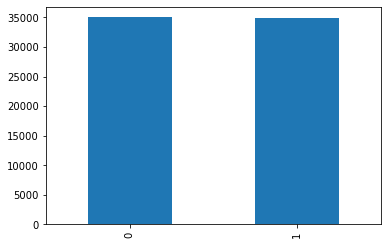

In [4]:
# Check how many samples of each class there are and plot it 
data['cardio'].value_counts().plot(kind = 'bar');

In [5]:
# check datatypes in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
# view information about our data
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


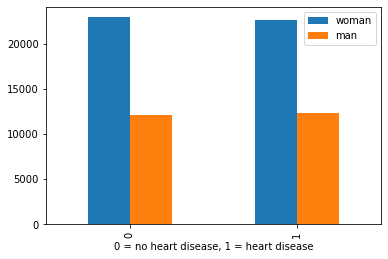

In [7]:
# use pd.crosstab to check the heart disease frequency acording to the gender and plot it
pd.crosstab(data['cardio'], data['gender']).plot(kind = 'bar')
plt.xlabel('0 = no heart disease, 1 = heart disease')
plt.legend(['woman','man'])
plt.show()

#### We can se that it is more common for women to have heart disease in this dataset 

### View the distribution of the age using a histogram (remember that the age is in days)

<AxesSubplot:>

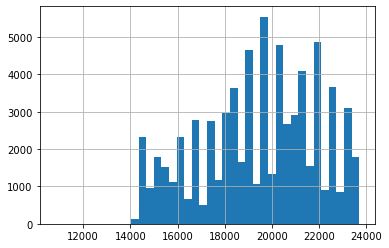

In [8]:
data['age'].T.hist(bins = 40)

### Make a correlation matrix and plot it using seaborn 

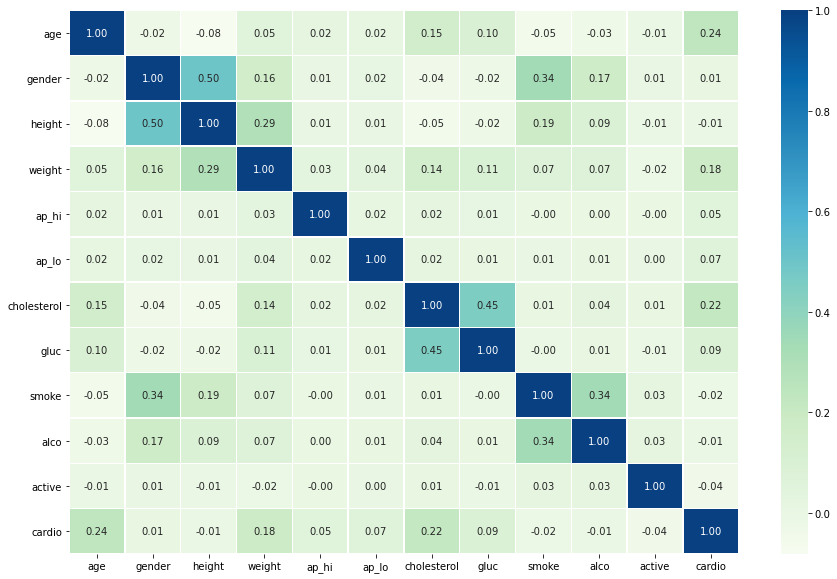

In [9]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr_matrix, 
    annot = True, 
    linewidths = 0.5,
    fmt = '0.2f', 
    cmap = 'GnBu'
)

### We can se a positive correlation betweeen the gender an if the patient smoke or not, lets see it in a bar graph 

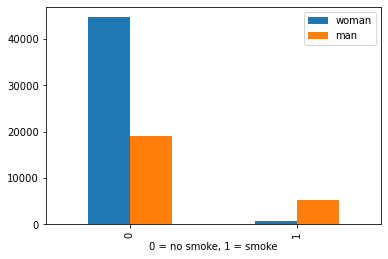

In [10]:
pd.crosstab(data['smoke'], data['gender']).plot(kind = 'bar')
plt.xlabel('0 = no smoke, 1 = smoke')
plt.legend(['woman','man'])
plt.show()

#### In proportion, there are many more male smokers than female smokers 

## Creating models

In [11]:
# Split data into X and y
X = data.drop(labels = 'cardio', axis = 1)
y = data['cardio']

In [12]:
# split the data into training and test datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### In this notebook we are going to build, test and tune 2 sklearn machine learning models
 - `RandomForestClassifier()`
 - `LogisticRegression()`

### Create and fit a stock random forest classifier

In [13]:
np.random.seed(7)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# evaluate the stock model on test data
clf.score(X_test, y_test)

0.7135

### Improving this score tuning the hyperparameters with `RandomizedSearchCV()`

In [15]:
# grid of hyperparameters to tune
random_forest_grid = {
    'n_estimators': np.arange(10,1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

In [16]:
np.random.seed(7)

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = random_forest_grid,
    cv = 5,
    n_iter = 25,
    verbose = True,
    n_jobs = -1
)

# Fit random search for random forest classifier
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
# check wich are the best params
random_search_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

In [18]:
# evaluate the model on the test data using the score method
random_search_rf.score(X_test, y_test)

0.7394285714285714

### Evaluating the RandomForestClassifier model

In [19]:
# make some predictions to calculate evaluation metrics
y_preds = random_search_rf.predict(X_test)

In [20]:
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### ROC curve and Area under the curve
AUC of 0.8 is acceptable, but not exellent 

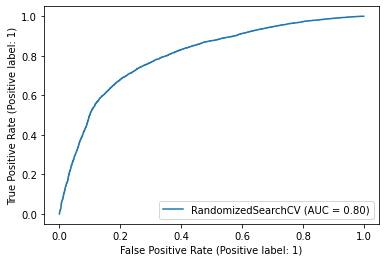

In [21]:
plot_roc_curve(random_search_rf, X_test, y_test);

### Making a confussion matrix and ploting it using `sns.heatmap`

In [22]:
# make a fucntion for ploting the confussion matrix for later use
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

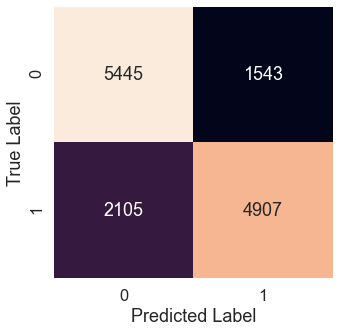

In [23]:
# plotting the confusion matrix of our randomforestclassifier model
conf_matrix(y_test,y_preds)

The confusion matrix shows a high number of false-negative predictions, lets see the precision predicting each category with a classification report:

### Classification report

In [24]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



### Evaluation metrics calculated using cross validation

In [25]:
# Check the best params for the RandomForestClassifier
random_search_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

In [26]:
# Create a RandomForestClassifier instance with the best params
rf_clf = RandomForestClassifier(
    n_estimators = 910,
    min_samples_split = 4,
    min_samples_leaf = 15,
    max_depth = 10
)

In [27]:
# Use cross_validation and the scoring parameter to evaluate the classifier and make a function for later use
def cv_classification_report(classifier, X, y):
    
    cv_accuracy = cross_val_score(classifier, X, y, scoring = 'accuracy', n_jobs = -1)
    cv_accuracy = np.mean(cv_accuracy)
    
    cv_precision = cross_val_score(classifier, X, y, scoring = 'precision', n_jobs = -1)
    cv_precision = np.mean(cv_precision)
    
    cv_recall = cross_val_score(classifier,X,y,scoring = 'recall', n_jobs = -1)
    cv_recall = np.mean(cv_recall)
    
    cv_f1 = cross_val_score(classifier, X, y, scoring = 'f1', n_jobs = -1)
    cv_f1 = np.mean(cv_f1)
    
    return {
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
    }

In [28]:
# use the function
cv_metrics = cv_classification_report(rf_clf, X, y)

In [29]:
# view the cross-validated metrics
cv_metrics

{'Accuracy': 0.7356,
 'Precision': 0.761668775121885,
 'Recall': 0.6850396693546112,
 'F1 Score': 0.7212988919580127}

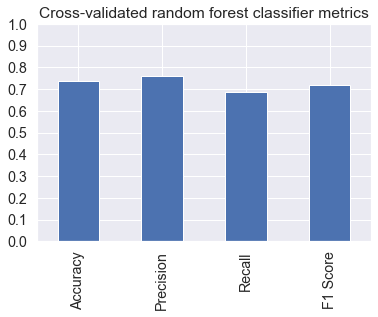

In [30]:
# save the metrics in a pandas dataframe and plot it in a bar graph
# the variable name is for 'cross-validated random forest classifier metrics'
cv_rfc_metrics_df = pd.DataFrame(cv_metrics, index = [0]) 

sns.set(font_scale = 1.3)

cv_rfc_metrics_df.T.plot.bar(title = 'Cross-validated random forest classifier metrics', legend = False)
plt.yticks(np.linspace(0,1,11));

### Create and fit a stock LogisticRegression classifier

#### Preprocing the data
GradientDecent based model requiere data to be scaled

In [31]:
# create an instance of the scaler
std = StandardScaler()

# use StandardScaler to scale X
X_scaled = std.fit_transform(X)

In [32]:
# split into train and test datasets (The s in the varible names is for scaled)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)

In [33]:
lr_stock = LogisticRegression()
lr_stock.fit(X_train_s, y_train)

LogisticRegression()

In [34]:
# Evaluate the stock model on the test data using the scoring method
lr_stock.score(X_test_s, y_test)

0.7252571428571428

### Lets improve the model tuning the hyperparameters using RandomizedSearchCV

In [35]:
# grid with hyperparameters to tune
logistic_regression_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

rs_logistic_regression = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = logistic_regression_grid,
    cv = 5,
    n_iter = 20,
    verbose = True,
    n_jobs = -1
)

# Fit the random hyperparameter search for logistic regression
rs_logistic_regression.fit(X_train_s, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
# check the best hyperparameters
rs_logistic_regression.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [37]:
# evaluate the model on the test data using the score method
rs_logistic_regression.score(X_test_s, y_test)

0.7254857142857143

### Evaluating the Logistic regression model

In [38]:
# make a logistic regression classifier model with the best params
lr_clf = LogisticRegression(
    solver = 'liblinear',
    C =  29.763514416313132
)

# Fit the model
lr_clf.fit(X_train_s, y_train)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [39]:
# make predictions on test data to evaluate
lr_y_preds = lr_clf.predict(X_test_s)
lr_y_preds

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### ROC curve and Area under the curve

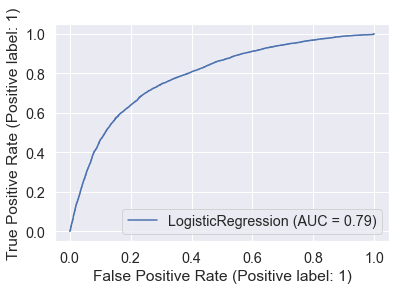

In [40]:
plot_roc_curve(lr_clf, X_test_s, y_test);

### Confusion matrix

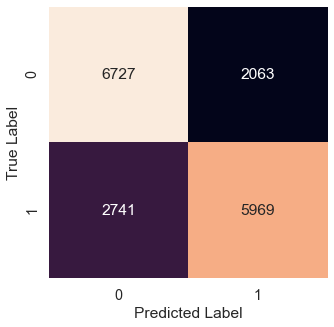

In [41]:
conf_matrix(y_test,lr_y_preds)

### Classification Report 

In [42]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8790
           1       0.74      0.69      0.71      8710

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.72     17500
weighted avg       0.73      0.73      0.73     17500



In [43]:
cv_lr_metrics = cv_classification_report(lr_clf, X_test_s, y_test)

In [44]:
cv_lr_metrics

{'Accuracy': 0.7156,
 'Precision': 0.7343207344982216,
 'Recall': 0.6717566016073478,
 'F1 Score': 0.7016048899650729}

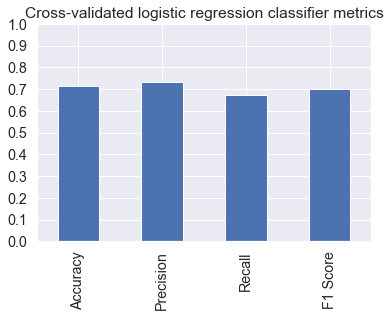

In [45]:
# save the metrics in a pandas dataframe and plot it in a bar graph
cv_lr_metrics_df = pd.DataFrame(cv_lr_metrics, index = [0]) 

sns.set(font_scale = 1.3)

cv_lr_metrics_df.T.plot.bar(title = 'Cross-validated logistic regression classifier metrics', legend = False)
plt.yticks(np.linspace(0,1,11));

## Model comparison
Now that we have 2 classifiers, one random forest classifier and one logistic regression we should compare both of them, and we have the cross validated metrics for each model in 2 variables:

In [46]:
# evaluation metrics for the random forest classifier
cv_rfc_metrics_df

,Accuracy,Precision,Recall,F1 Score
0,0.7356,0.761669,0.68504,0.721299


In [47]:
# evaluation metrics for the logistic regression classifier
cv_lr_metrics_df

,Accuracy,Precision,Recall,F1 Score
0,0.7156,0.734321,0.671757,0.701605


We can se that both models are so close, but in every metric the RandomForestClassifier wins over the Logistic Regression

The RandomForestClassifier model is still in a variable:

In [48]:
rf_clf

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=4,
                       n_estimators=910)